In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (105, 4) (105,)
Test set: (45, 4) (45,)


Accuracy:  0.9333333333333333


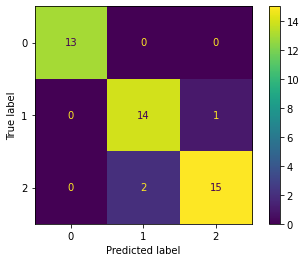

In [3]:
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(),
                        n_estimators=2)
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,yhat))
plot_confusion_matrix(clf,X_test,y_test)

Accuracy:  0.9333333333333333


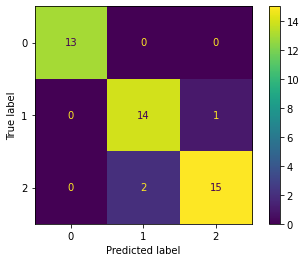

In [7]:
clf2 = GradientBoostingClassifier(learning_rate=0.1,
                                  n_estimators=2,
                                  tol=0.0001, #parametros propios del boosting, a partir de aquí del arbol
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  min_weight_fraction_leaf=0.0,
                                  max_depth=3,
                                  random_state=None,
                                  max_features=None)
clf2.fit(X_train, y_train)
yhat2 = clf2.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,yhat2))
plot_confusion_matrix(clf2,X_test,y_test)

Accuracy:  0.9555555555555556


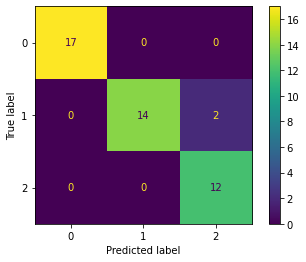

In [33]:
clf_bag = BaggingClassifier(base_estimator=GaussianNB(),
                  n_estimators=10,
                  random_state=0)
clf_bag.fit(X_train, y_train)
yhat_bag = clf_bag.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,yhat_bag))
plot_confusion_matrix(clf_bag,X_test,y_test)

In [34]:
clf0_vot = neighbors.KNeighborsClassifier(28, n_jobs=-1)
clf1_vot = LogisticRegression(solver = "liblinear", multi_class ="auto")
clf2_vot = RandomForestClassifier(n_estimators=100)
clf3_vot = GaussianNB()

Accuracy:  0.9777777777777777


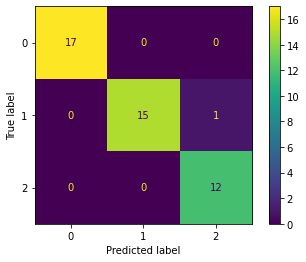

In [35]:
clf_vot = VotingClassifier(estimators=[('knn', clf0_vot),('lr', clf1_vot), ('rf', clf2_vot), ('gnb', clf3_vot)],
                           voting='soft', #para tener las probabilidades, 'hard' para tener solo la clase
                           weights=[1,1,1,1])
clf_vot.fit(X_train, y_train)
yhat_vot = clf_vot.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,yhat_vot))
plot_confusion_matrix(clf_vot,X_test,y_test)